In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from PIL import Image
import skimage as sk
from skimage import io as sk_io
import cv2

In [17]:
src_file = "/content/drive/My Drive/CVData/goku.png"

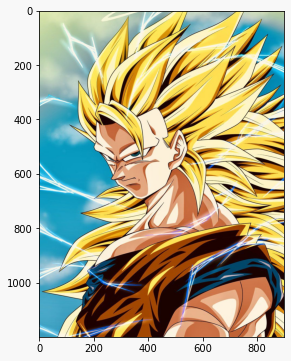

In [28]:
# Load the image from the source file
image = mp_image.imread(src_file)

# Display it
fig = plt.figure(figsize=(6, 6))
fig.patch.set_facecolor("#f8f8f8ff")
plt.imshow(image)

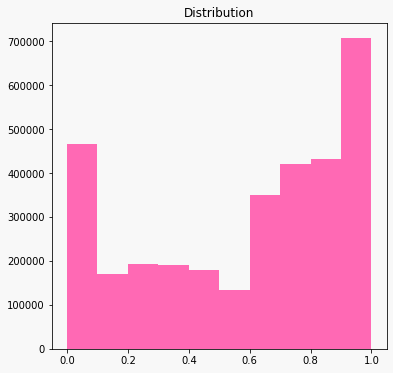

In [48]:
fig = plt.figure(figsize=(6, 6))
fig.patch.set_facecolor("#f8f8f8ff")
a=fig.add_subplot(1, 1,1)
a.set_facecolor("#f8f8f8ff")
a.set_title("Distribution")
plt.hist(image.ravel(), color = "hotpink", lw =0)
plt.show()

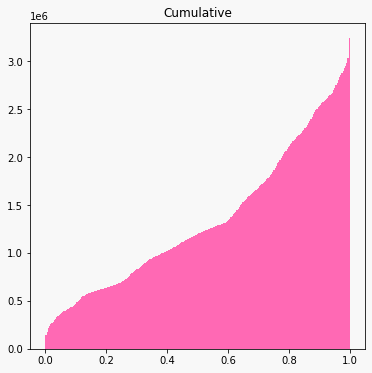

In [49]:
fig = plt.figure(figsize=(6, 6))
fig.patch.set_facecolor("#f8f8f8ff")
a=fig.add_subplot(1, 1,1)
a.set_facecolor("#f8f8f8ff")
a.set_title("Cumulative")
plt.hist(image.ravel(), bins=255, cumulative=True, color = "hotpink")
plt.show()

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


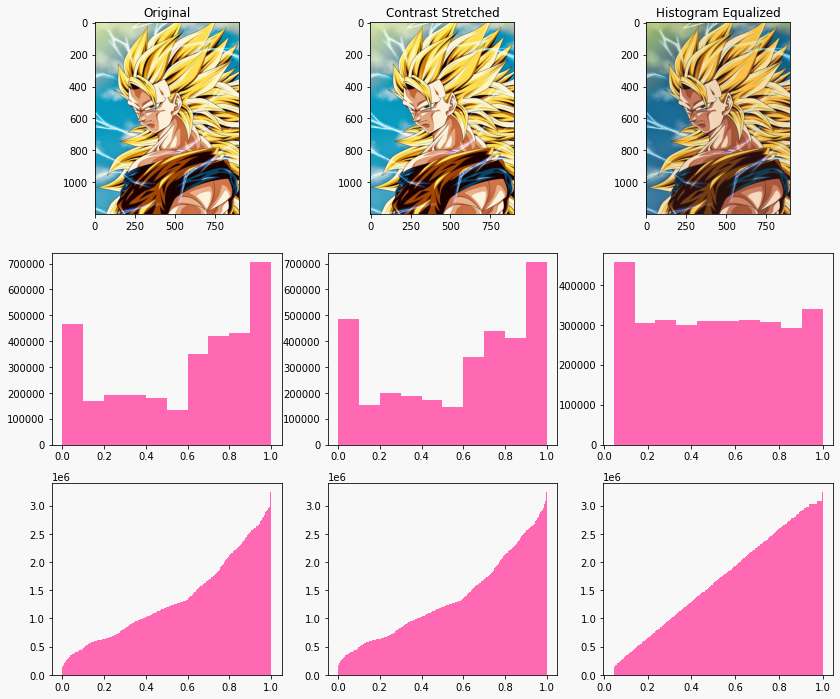

In [51]:
from skimage import exposure
import numpy as np

# Contrast stretching
p2 = np.percentile(image, 5)
p98 = np.percentile(image, 95)
image_ct = exposure.rescale_intensity(image, in_range=(p2, p98))

# Histogram Equalization
image_eq = exposure.equalize_hist(image)

# Show the images 
fig = plt.figure(figsize=(14, 12))
fig.patch.set_facecolor("#f8f8f8ff")


# Subplot for original image
a=fig.add_subplot(3,3,1)
imgplot = plt.imshow(image)
a.set_title('Original')
a.set_facecolor("#f8f8f8ff")


# Subplot for contrast stretched image
a=fig.add_subplot(3,3,2)
imgplot = plt.imshow(image_ct)
a.set_title('Contrast Stretched')
a.set_facecolor("#f8f8f8ff")


# Subplot for equalized image
a=fig.add_subplot(3,3,3)
imgplot = plt.imshow(image_eq)
a.set_title('Histogram Equalized')
a.set_facecolor("#f8f8f8ff")


# Subplots for histograms
a=fig.add_subplot(3,3,4)
a.set_facecolor("#f8f8f8ff")

imgplot = plt.hist(image.ravel(), color = "hotpink")

a=fig.add_subplot(3,3,5)
a.set_facecolor("#f8f8f8ff")

imgplot = plt.hist(image_ct.ravel(), color = "hotpink")

a=fig.add_subplot(3,3,6)
a.set_facecolor("#f8f8f8ff")

imgplot = plt.hist(image_eq.ravel(), color = "hotpink")

# Subplots for CDFs

a=fig.add_subplot(3,3,7)
a.set_facecolor("#f8f8f8ff")

imgplot = plt.hist(image.ravel(), bins=255, cumulative=True, color = "hotpink")

a=fig.add_subplot(3,3,8)
a.set_facecolor("#f8f8f8ff")

imgplot = plt.hist(image_ct.ravel(), bins=255, cumulative=True, color = "hotpink")

a=fig.add_subplot(3,3,9)
a.set_facecolor("#f8f8f8ff")

imgplot = plt.hist(image_eq.ravel(), bins=255, cumulative=True, color = "hotpink")

plt.show()

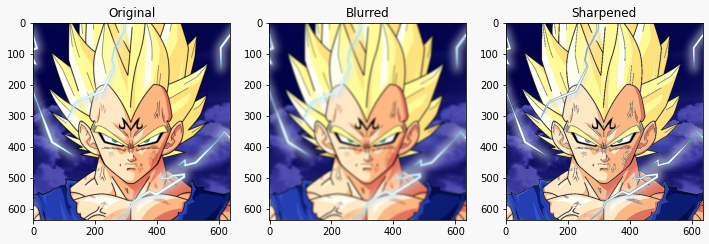

In [63]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

# Load the image from the source file
image_file = "/content/drive/My Drive/CVData/vegeta.png"
image = Image.open(image_file)

blurred_image = image.filter(ImageFilter.BLUR)
blurred = blurred_image.filter(ImageFilter.BLUR)
sharpened_image = image.filter(ImageFilter.SHARPEN)
sharpen = sharpened_image.filter(ImageFilter.SHARPEN)
sharp = sharpen.filter(ImageFilter.SHARPEN)
# Display it
fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor("#f8f8f8ff")


# Plot original image
a=fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")
a.set_facecolor("#f8f8f8ff")


# Plot blurred image
a=fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(blurred)
a.set_title("Blurred")
a.set_facecolor("#f8f8f8ff")


# Plot sharpened image
a=fig.add_subplot(1, 3, 3)
image_plot_3 = plt.imshow(sharp)
a.set_title("Sharpened")
a.set_facecolor("#f8f8f8ff")


plt.show()

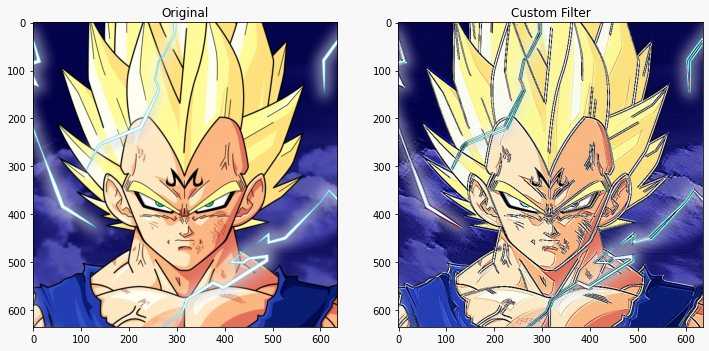

In [70]:
my_kernel = (700, 150, -400,
             -850, 700, -850,
            -400, 150, 700)

filtered_image = image.filter(ImageFilter.Kernel((3,3), my_kernel))

# Display it
fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor("#f8f8f8ff")


# Plot original image
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")
a.set_facecolor("#f8f8f8ff")


# Plot filtered image
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(filtered_image)
a.set_title("Custom Filter")
a.set_facecolor("#f8f8f8ff")


plt.show()

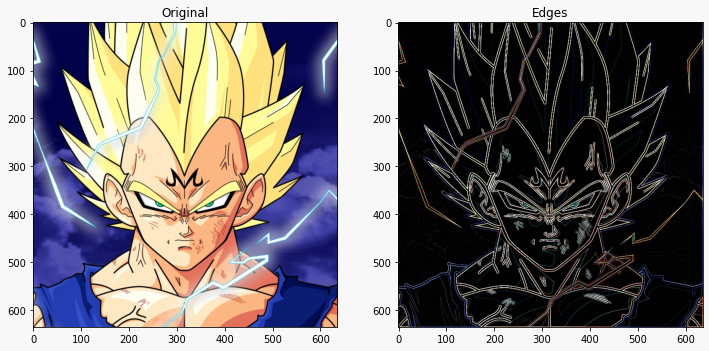

In [71]:
image = Image.open(image_file)

edges_image = image.filter(ImageFilter.FIND_EDGES)

# Display it
fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor("#f8f8f8ff")


# Plot original image
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")
a.set_facecolor("#f8f8f8ff")


# Plot filtered image
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(edges_image)
a.set_title("Edges")
a.set_facecolor("#f8f8f8ff")


plt.show()

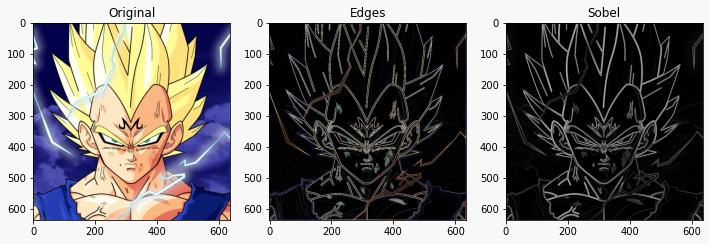

In [74]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # Convert color image to gray scale
    dx = ndimage.sobel(image, 1)  # horizontal derivative
    dy = ndimage.sobel(image, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
    mag = mag.astype(np.uint8)
    return mag

sobel_image = edge_sobel(np.array(image))

# Display it
fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor("#f8f8f8ff")


# Plot original image
a=fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")
a.set_facecolor("#f8f8f8ff")


# Plot PIL FIND_EDGES image
a=fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(edges_image)
a.set_title("Edges")
a.set_facecolor("#f8f8f8ff")


# Plot Sobel image
a=fig.add_subplot(1, 3, 3)
image_plot_2 = plt.imshow(sobel_image, cmap="gray") # Need to use a gray color map as we converted this to a grayscale image
a.set_title("Sobel")
a.set_facecolor("#f8f8f8ff")


plt.show()